In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans
import seaborn as sns
from ipynb.fs.full.main_functions import chooseBestKforKMeans, kMeansRes

In [21]:

grezzo = pd.read_csv('DatixAnalisi.csv')
df_meno1colonne = grezzo.drop(columns=['Unnamed: 0', 'Name'])

# centrare e scalare i dati
sc_df = preprocessing.scale(df_meno1colonne)
#convert to dataframe
X = pd.DataFrame(sc_df)

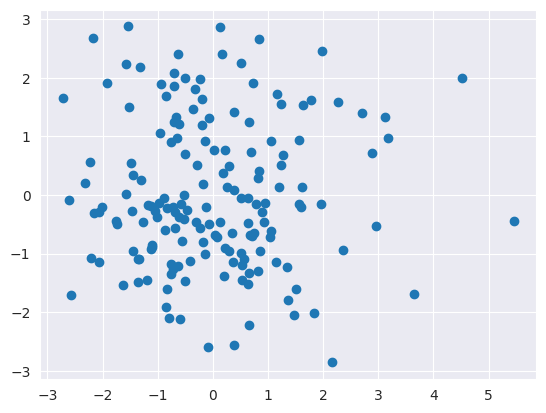

In [22]:
#do pca and plot scatter
#Kmeans
pca = PCA(n_components=2).fit(X)
data2D = pca.transform(X)
plt.figure()
plt.scatter(data2D[:,0], data2D[:,1])
plt.show()
plt.close()

In [23]:
# choose k range
k_range=range(2,20)
# compute adjusted intertia
best_k, results = chooseBestKforKMeans(sc_df, k_range)
print(best_k, results)

11     Scaled Inertia
k                 
2         0.928502
3         0.868444
4         0.834286
5         0.815456
6         0.797903
7         0.788319
8         0.790140
9         0.785447
10        0.783674
11        0.782830
12        0.790297
13        0.799343
14        0.803748
15        0.808182
16        0.816975
17        0.818787
18        0.825764
19        0.835172


([<matplotlib.axis.XTick at 0x7f3696321190>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

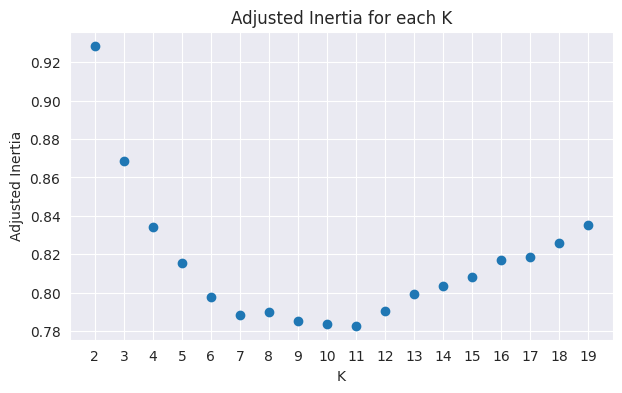

In [24]:
#plot inertia
# plot the results
plt.figure(figsize=(7,4))
plt.plot(results,'o')
plt.title('Adjusted Inertia for each K')
plt.xlabel('K')
plt.ylabel('Adjusted Inertia')
plt.xticks(range(2,20,1))

In [25]:
#doing k means with best k
km = KMeans(n_clusters=best_k)
#predict the cluster of belonging
y_predicted = km.fit_predict(X)

#add columns to the dataframes
X['Cluster'] = y_predicted
data2D= pd.DataFrame(data2D)
data2D['Cluster'] = y_predicted

#extract centroids
centers2D = pca.transform(km.cluster_centers_)




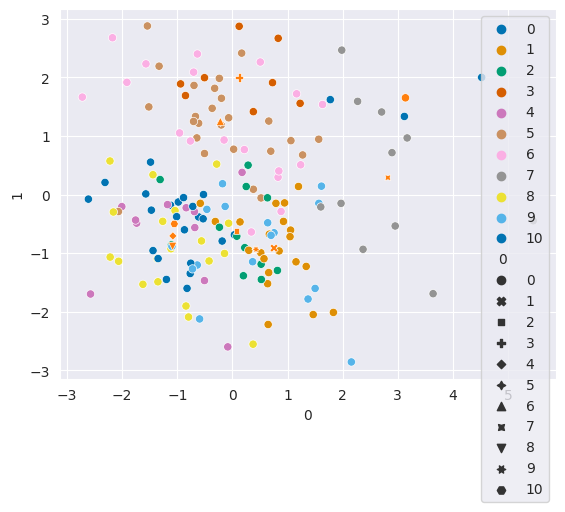

In [26]:
##visualize clusters
setCluster = pd.DataFrame(set(data2D.Cluster))
centers2D = pd.DataFrame(centers2D)
sns.scatterplot(data = data2D, x = 0, y = 1, hue='Cluster', palette = 'colorblind')
sns.scatterplot(data=centers2D, x = centers2D.iloc[:,0], y = centers2D.iloc[:,1], style=setCluster.iloc[:,0])
plt.show()
